In [1]:
# Imports
from google.colab import drive
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models, preprocessing

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import Kaggle dataset
reviewsDF = pd.read_csv('/content/drive/MyDrive/cleaned_reviews.csv')
reviewsDF = reviewsDF.dropna()    # Drop empty rows
reviewsDF['sentiments'].replace(['negative', 'neutral', 'positive'], [0, 1, 2], inplace=True)   # Convert sentiments (target) into numerical values
reviewsDF = reviewsDF.drop('cleaned_review_length', axis=1)   # Drop cleaned review length column
reviewsDF = reviewsDF.drop('review_score', axis=1)    # Drop review score column
display(reviewsDF.head())
reviewsDF.count()

,sentiments,cleaned_review
0,2,i wish would have gotten one earlier love it a...
1,1,i ve learned this lesson again open the packag...
2,1,it is so slow and lags find better option
3,1,roller ball stopped working within months of m...
4,1,i like the color and size but it few days out ...


sentiments        17337
cleaned_review    17337
dtype: int64

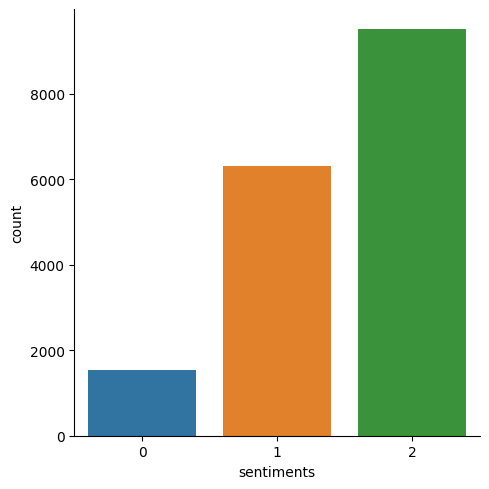

In [4]:
# Display graphical distribution of the target classes
graph = sns.catplot(x="sentiments", kind="count", data=reviewsDF, height=5, aspect=1)

This dataset contains scraped reviews from the Amazon site. The classes are as follows: negative (0 in graph), neural (1 in graph), and positive (2 in graph). This dataset is a medium-sized dataset with little over 17000 rows. The features of this dataset is the cleaned reviews. Based on the cleaned reviews, the model should be able to numerically determine the sentiment of a given review. The data looks to be heavily biased. Based on the above graph, there looks to be about 5 times as much positive reviews as there are negative reviews.

In [5]:
# Divide data into X and y
X = reviewsDF['cleaned_review']
y = reviewsDF['sentiments']

In [6]:
# Split data into train (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=789)

In [7]:
# Count vectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [8]:
# Apply count vectorizer
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
# Convert label data to one-hot values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Sequential Model

In [10]:
# Build Sequential Keras model
modelSeq = models.Sequential()
modelSeq.add(layers.Dense(48, activation='relu', input_shape=(X_train.shape[1],)))
modelSeq.add(layers.Dropout(0.1))    # Added to reduce overfitting
modelSeq.add(layers.Dense(24, activation='relu'))
modelSeq.add(layers.Dense(reviewsDF['sentiments'].nunique(), activation='softmax'))

# Configure model for training
modelSeq.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (I kept epochs low since after each epoch the accuracy looks to be fairly high and wanted to keep loss low after model evaluation)
modelSeq.fit(X_train, y_train, epochs=5, verbose=0)

# Evaluate the model
result = modelSeq.evaluate(X_test, y_test, verbose=0)
print('Test loss:', result[0])
print('Test accuracy:', result[1])

Test loss: 0.4063616096973419
Test accuracy: 0.8800461292266846


RNN

In [11]:
# pad the data
#max_words = 500
#X_train = preprocessing.sequence.pad_sequences(X_train.todense(), maxlen=max_words)
#X_test = preprocessing.sequence.pad_sequences(X_test.todense(), maxlen=max_words)

# Buid Sequential model with Embedding and SimpleRNN layers
#modelRNN = models.Sequential()
#modelRNN.add(layers.Embedding(10000, 32))
#modelRNN.add(layers.SimpleRNN(32))
#modelRNN.add(layers.Dense(reviewsDF['sentiments'].nunique(), activation='softmax'))

#modelRNN.summary()

In [12]:
# Configure model for training
#modelRNN.compile(optimizer='rmsprop',
 #             loss='categorical_crossentropy',
#              metrics=['accuracy'])

# Train the model
#modelRNN.fit(X_train, y_train, epochs=5, batch_size=128, verbose=0)

# Evaluate the model
#resultRNN = modelRNN.evaluate(X_test, y_test, verbose=0)
#print('Test loss:', resultRNN[0])
#print('Test accuracy:', resultRNN[1])

I got around 87% accuracy when I trained with Sequential model. I did not get time to try other models since CNN model and RNN model were erroring out on me and crashing in Google Colab.